**Example of work - Sales Analysis**

Below is a short analysis of sample sales data for vehicles sold by a business between 2003 - 2005.  Tableau diagrams included in this folder as well as links at the bottom of the notebook.

**Read in data and connect to database**

*Import packages*

In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

*Read in the data* - Data source: https://www.kaggle.com/datasets/kyanyoga/sample-sales-data?select=sales_data_sample.csv

In [3]:
sales = pd.read_csv("sales_data_sample.csv", encoding='latin-1') 

*Connect to database*

In [4]:
connection = sqlite3.connect('vehicle_sales.db')
sales.to_sql('sales', connection, if_exists='replace', index=False)

2823

*View whole database*

In [5]:
query = 'SELECT * FROM  sales'
df = pd.read_sql_query(query, connection)
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,None,NYC,NY,10022,USA,None,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,05/07/2003 00:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,None,Reims,None,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,07/01/2003 00:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,None,Paris,None,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,None,Pasadena,CA,90003,USA,None,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 00:00,Shipped,4,10,2003,...,7734 Strong St.,None,San Francisco,CA,None,USA,None,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/02/2004 00:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",None,Madrid,None,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,None,Oulu,None,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,03/01/2005 00:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",None,Madrid,None,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,None,Toulouse,None,31000,France,EMEA,Roulet,Annette,Small


In [6]:
cursor = connection.cursor()

*Print out a table of the columns and data types*

In [7]:
cursor.execute("pragma table_info(sales)")
columns_info = cursor.fetchall()
columns_info[0]

(0, 'ORDERNUMBER', 'INTEGER', 0, None, 0)

In [8]:
col_info = pd.DataFrame(columns_info, columns=[d[0] for d in cursor.description])
col_info[['name', 'type']]

,name,type
0,ORDERNUMBER,INTEGER
1,QUANTITYORDERED,INTEGER
2,PRICEEACH,REAL
3,ORDERLINENUMBER,INTEGER
4,SALES,REAL
5,ORDERDATE,TEXT
6,STATUS,TEXT
7,QTR_ID,INTEGER
8,MONTH_ID,INTEGER
9,YEAR_ID,INTEGER


In [9]:
cursor.close()
connection.close()

*Read in population csv*

In [10]:
population = pd.read_csv("population_by_country_2020.csv", encoding='latin-1') 
connection = sqlite3.connect('vehicle_sales.db')
population.to_sql('population', connection, if_exists='replace', index=False)

235

In [11]:
query = 'SELECT * FROM population'
df = pd.read_sql_query(query, connection)
df

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/KmÂ²),Land Area (KmÂ²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39%,5540090,153,9388211,-348399.0,1.7,38,61%,18.47%
1,India,1382345085,0.99%,13586631,464,2973190,-532687.0,2.2,28,35%,17.70%
2,United States,331341050,0.59%,1937734,36,9147420,954806.0,1.8,38,83%,4.25%
3,Indonesia,274021604,1.07%,2898047,151,1811570,-98955.0,2.3,30,56%,3.51%
4,Pakistan,221612785,2.00%,4327022,287,770880,-233379.0,3.6,23,35%,2.83%
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4993,0.06%,3,50,100,NaN,N.A.,N.A.,10%,0.00%
231,Falkland Islands,3497,3.05%,103,0,12170,NaN,N.A.,N.A.,66%,0.00%
232,Niue,1628,0.68%,11,6,260,NaN,N.A.,N.A.,46%,0.00%
233,Tokelau,1360,1.27%,17,136,10,NaN,N.A.,N.A.,0%,0.00%


In [12]:
cursor = connection.cursor()
cursor.execute("pragma table_info(population)")
columns_info = cursor.fetchall()
columns_info[0]

(0, 'Country (or dependency)', 'TEXT', 0, None, 0)

In [13]:
col_info = pd.DataFrame(columns_info, columns=[d[0] for d in cursor.description])
col_info[['name', 'type']]

,name,type
0,Country (or dependency),TEXT
1,Population (2020),INTEGER
2,Yearly Change,TEXT
3,Net Change,INTEGER
4,Density (P/KmÂ²),INTEGER
5,Land Area (KmÂ²),INTEGER
6,Migrants (net),REAL
7,Fert. Rate,TEXT
8,Med. Age,TEXT
9,Urban Pop %,TEXT


In [14]:
cursor.close()
connection.close()

**Data cleaning**

*Check for na values*

In [15]:
connection = sqlite3.connect('vehicle_sales.db')

In [16]:
query = 'SELECT * FROM  sales'
df = pd.read_sql_query(query, connection)
df.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [17]:
query = 'SELECT * FROM  population'
df = pd.read_sql_query(query, connection)
df.isna().sum()

Country (or dependency)     0
Population (2020)           0
Yearly Change               0
Net Change                  0
Density (P/KmÂ²)            0
Land Area (KmÂ²)            0
Migrants (net)             34
Fert. Rate                  0
Med. Age                    0
Urban Pop %                 0
World Share                 0
dtype: int64

With the sales data only TERRITORY is necessary for this analysis so will explore further  
With the population data Migrants (net) not needed for this analysis so will ignore missing values

In [18]:
query = 'SELECT TERRITORY, COUNTRY FROM sales'
df = pd.read_sql_query(query, connection)
df

,TERRITORY,COUNTRY
0,None,USA
1,EMEA,France
2,EMEA,France
3,None,USA
4,None,USA
...,...,...
2818,EMEA,Spain
2819,EMEA,Finland
2820,EMEA,Spain
2821,EMEA,France


In [19]:
query = 'SELECT DISTINCT COUNTRY FROM sales WHERE TERRITORY IS NULL'
df = pd.read_sql_query(query, connection)
df

,COUNTRY
0,USA
1,Canada


As it's only USA and Canada with missing territories - will impute this with "Americas"

In [20]:
cursor = connection.cursor()
cursor.execute('UPDATE sales SET TERRITORY = "Americas" WHERE TERRITORY IS NULL')
connection.commit()
connection.close()

In [21]:
connection = sqlite3.connect('vehicle_sales.db')

In [22]:
query = 'SELECT DISTINCT COUNTRY, TERRITORY FROM sales GROUP BY COUNTRY'
df = pd.read_sql_query(query, connection)
df

,COUNTRY,TERRITORY
0,Australia,APAC
1,Austria,EMEA
2,Belgium,EMEA
3,Canada,Americas
4,Denmark,EMEA
5,Finland,EMEA
6,France,EMEA
7,Germany,EMEA
8,Ireland,EMEA
9,Italy,EMEA


In [23]:
query = 'SELECT DISTINCT COUNTRY FROM sales WHERE TERRITORY IS NULL'
df = pd.read_sql_query(query, connection)
df

,COUNTRY


In [24]:
df.isna().sum()

COUNTRY    0
dtype: int64

In [25]:
connection.close()

**Now we know what information is in the table and in which form, questions that the company may want answers to are:**  

Overall sales by volume and amount  
Country/ city ordering the most/ highest value vs the least/ lowest value  
Which products are doing best to know whether to stock more?  
Which products are doing worst to know whether to stock less?  
Comparison of products to the recommended manufacturing retail price  
Range of price per product  
Which company is ordering the most/  highest value  
Which time of year is best for sales?  
Which year was best?  

**Overall sales by volume and amount**

In [26]:
connection = sqlite3.connect('vehicle_sales.db')
cursor = connection.cursor()

*Total sales (Amount)*

query = 'SELECT SUM(SALES) AS "Total Sales (Amount)" FROM sales'
df = pd.read_sql_query(query, connection)
df

*Total sales (Volume)*

In [27]:
query = 'SELECT SUM(QUANTITYORDERED) AS "Total Sales (Volume)" FROM sales'
df = pd.read_sql_query(query, connection)
df

,Total Sales (Volume)
0,99067


*Total sales (Amount) per City*

In [28]:
query = 'SELECT CITY AS "City", sum(SALES) AS "Total Sales (Amount)" FROM sales GROUP BY CITY ORDER BY "Total Sales (Amount)" DESC'
df = pd.read_sql_query(query, connection)
df

,City,Total Sales (Amount)
0,Madrid,1082551.44
1,San Rafael,654858.06
2,NYC,560787.77
3,Singapore,288488.41
4,Paris,268944.68
...,...,...
68,Brisbane,50218.51
69,Los Angeles,48048.46
70,Burbank,46084.64
71,Munich,34993.92


*Total sales (Volume) per City*

In [29]:
query = 'SELECT CITY AS "City", SUM(SALES) AS "Total Sales (Volume)" FROM sales GROUP BY CITY ORDER BY "Total Sales (Volume)" DESC'
df = pd.read_sql_query(query, connection)
df

,City,Total Sales (Volume)
0,Madrid,1082551.44
1,San Rafael,654858.06
2,NYC,560787.77
3,Singapore,288488.41
4,Paris,268944.68
...,...,...
68,Brisbane,50218.51
69,Los Angeles,48048.46
70,Burbank,46084.64
71,Munich,34993.92


*Total sales (Amount) per Country*

In [30]:
query = 'SELECT COUNTRY AS "Country", SUM(SALES) AS "Total Sales (Amount)" FROM sales GROUP BY COUNTRY ORDER BY "Total Sales (Amount)" DESC'
df = pd.read_sql_query(query, connection)
df

,Country,Total Sales (Amount)
0,USA,3627982.83
1,Spain,1215686.92
2,France,1110916.52
3,Australia,630623.10
4,UK,478880.46
5,Italy,374674.31
6,Finland,329581.91
7,Norway,307463.70
8,Singapore,288488.41
9,Denmark,245637.15


*Checking to see if there are any differences in naming convention for country in the sales data compared to population data*

In [31]:
query = 'SELECT sales.COUNTRY, population."Country (or dependency)" FROM sales LEFT JOIN population ON sales.COUNTRY = population."Country (or dependency)"'
df = pd.read_sql_query(query, connection)
df

,COUNTRY,Country (or dependency)
0,USA,None
1,France,France
2,France,France
3,USA,None
4,USA,None
...,...,...
2818,Spain,Spain
2819,Finland,Finland
2820,Spain,Spain
2821,France,France


In [32]:
query = 'SELECT DISTINCT sales.COUNTRY, population."Country (or dependency)" FROM sales LEFT JOIN population ON sales.COUNTRY = population."Country (or dependency)" WHERE population."Country (or dependency)" IS NULL'
df = pd.read_sql_query(query, connection)
df

,COUNTRY,Country (or dependency)
0,USA,None
1,UK,None


In [33]:
query = 'SELECT "Country (or dependency)" AS "Country" FROM population WHERE "Country" = "United Kingdom" OR "Country" = "United States" OR "Country" = "United States of America"'
df = pd.read_sql_query(query, connection)
df

,Country
0,United States
1,United Kingdom


USA and UK are down as United States and United Kingdom in the population data so will change this in the population table to be able to join to the sales data.

In [34]:
cursor = connection.cursor()
cursor.execute('UPDATE population SET "Country (or dependency)" = "UK" WHERE "Country (or dependency)" = "United Kingdom"')
cursor.execute('UPDATE population SET "Country (or dependency)" = "USA" WHERE "Country (or dependency)" = "United States"')
connection.commit()
connection.close()

In [35]:
connection = sqlite3.connect('vehicle_sales.db')
query = 'SELECT DISTINCT sales.COUNTRY, population."Country (or dependency)" FROM sales LEFT JOIN population ON sales.COUNTRY = population."Country (or dependency)" WHERE population."Country (or dependency)" IS NULL'
df = pd.read_sql_query(query, connection)
df

,COUNTRY,Country (or dependency)


*Sales per capita for each country*

In [36]:
query = 'SELECT sales.COUNTRY as "Country", (SUM(sales.SALES)/ population."Population (2020)") AS "Sales (Amount) per capita" FROM sales LEFT JOIN population ON sales.COUNTRY = population."Country (or dependency)" GROUP BY sales.COUNTRY ORDER BY "Sales (Amount) per capita" DESC'
df = pd.read_sql_query(query, connection)
df

,Country,Sales (Amount) per capita
0,Finland,0.059467
1,Norway,0.056638
2,Singapore,0.049244
3,Denmark,0.042382
4,Spain,0.026000
5,Australia,0.024681
6,Austria,0.022413
7,Sweden,0.020772
8,France,0.017013
9,Switzerland,0.013584


*Total sales (Volume) per Country*

In [37]:
query = 'SELECT COUNTRY AS "Country", sum(QUANTITYORDERED) AS "Total Sales (Volume)" FROM sales GROUP BY COUNTRY ORDER BY "Total Sales (Volume)" DESC'
df = pd.read_sql_query(query, connection)
df

,Country,Total Sales (Volume)
0,USA,35659
1,Spain,12429
2,France,11090
3,Australia,6246
4,UK,5013
5,Italy,3773
6,Finland,3192
7,Norway,2842
8,Singapore,2760
9,Canada,2293


In [38]:
connection.close()

**Products**

*Most popular products and product lines by volume*

In [39]:
connection = sqlite3.connect('vehicle_sales.db')
query = 'SELECT PRODUCTCODE AS "Product Code", SUM(QUANTITYORDERED) AS "Total number ordered" FROM sales GROUP BY PRODUCTCODE ORDER BY "Total number ordered" DESC'
df = pd.read_sql_query(query, connection)
df

,Product Code,Total number ordered
0,S18_3232,1774
1,S24_3856,1052
2,S18_4600,1031
3,S700_4002,1029
4,S12_4473,1024
...,...,...
104,S18_2581,746
105,S24_3969,745
106,S18_2248,743
107,S24_1046,724


In [40]:
query = 'SELECT PRODUCTLINE AS "Product Line", SUM(QUANTITYORDERED) AS "Total number ordered" FROM sales GROUP BY PRODUCTLINE ORDER BY "Total number ordered" DESC'
df = pd.read_sql_query(query, connection)
df

,Product Line,Total number ordered
0,Classic Cars,33992
1,Vintage Cars,21069
2,Motorcycles,11663
3,Trucks and Buses,10777
4,Planes,10727
5,Ships,8127
6,Trains,2712


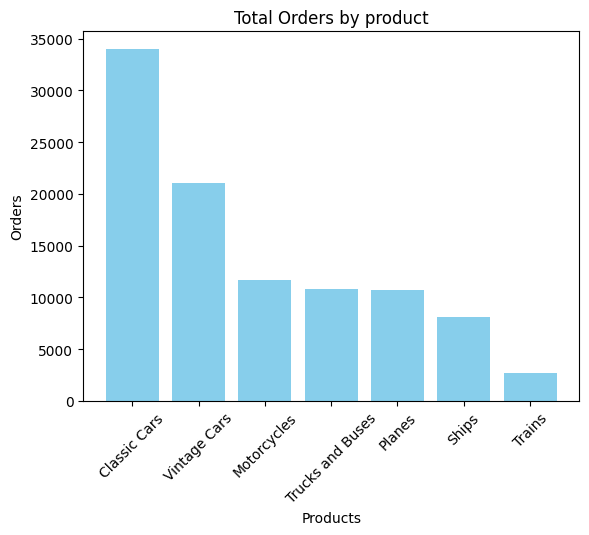

In [41]:
# Extracting data for plotting
products= df['Product Line']
orders = df['Total number ordered']

# Set the figure size to make the plot wider
plt.figure()

# Create a bar chart
plt.bar(products, orders, color='skyblue')

# Add labels and title
plt.xlabel('Products')
plt.ylabel('Orders')
plt.title('Total Orders by product')

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

*Most popular by total sales*

In [42]:
query = 'SELECT PRODUCTCODE as "Product Code", SUM(SALES) AS "Total Sales" FROM sales GROUP BY PRODUCTCODE ORDER BY "Total Sales" DESC'
df = pd.read_sql_query(query, connection)
df

,Product Code,Total Sales
0,S18_3232,288245.42
1,S10_1949,191073.03
2,S10_4698,170401.07
3,S12_1108,168585.32
4,S18_2238,154623.95
...,...,...
104,S24_1628,46676.51
105,S24_2972,46515.92
106,S24_2022,44667.16
107,S32_2206,41353.43


In [43]:
query = 'SELECT PRODUCTLINE AS "Product Line", SUM(SALES) AS "Total Sales" FROM sales GROUP BY PRODUCTLINE ORDER BY "Total Sales" DESC'
df = pd.read_sql_query(query, connection)
df

,Product Line,Total Sales
0,Classic Cars,3919615.66
1,Vintage Cars,1903150.84
2,Motorcycles,1166388.34
3,Trucks and Buses,1127789.84
4,Planes,975003.57
5,Ships,714437.13
6,Trains,226243.47


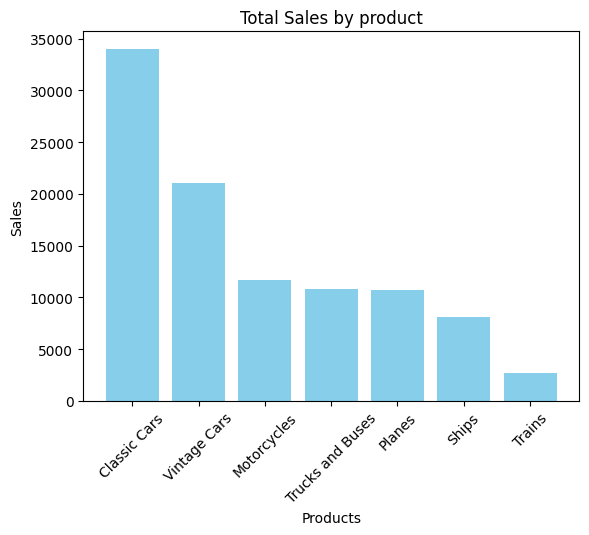

In [44]:
# Extracting data for plotting
products= df['Product Line']
sales = df['Total Sales']

# Set the figure size to make the plot wider
plt.figure()

# Create a bar chart
plt.bar(products, orders, color='skyblue')

# Add labels and title
plt.xlabel('Products')
plt.ylabel('Sales')
plt.title('Total Sales by product')

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

*Total sales per country*

In [45]:
query = 'SELECT COUNTRY AS "Country", SUM(SALES) AS "Total Sales" FROM sales GROUP BY COUNTRY ORDER BY "Total Sales" DESC'
df = pd.read_sql_query(query, connection)
df

,Country,Total Sales
0,USA,3627982.83
1,Spain,1215686.92
2,France,1110916.52
3,Australia,630623.10
4,UK,478880.46
5,Italy,374674.31
6,Finland,329581.91
7,Norway,307463.70
8,Singapore,288488.41
9,Denmark,245637.15


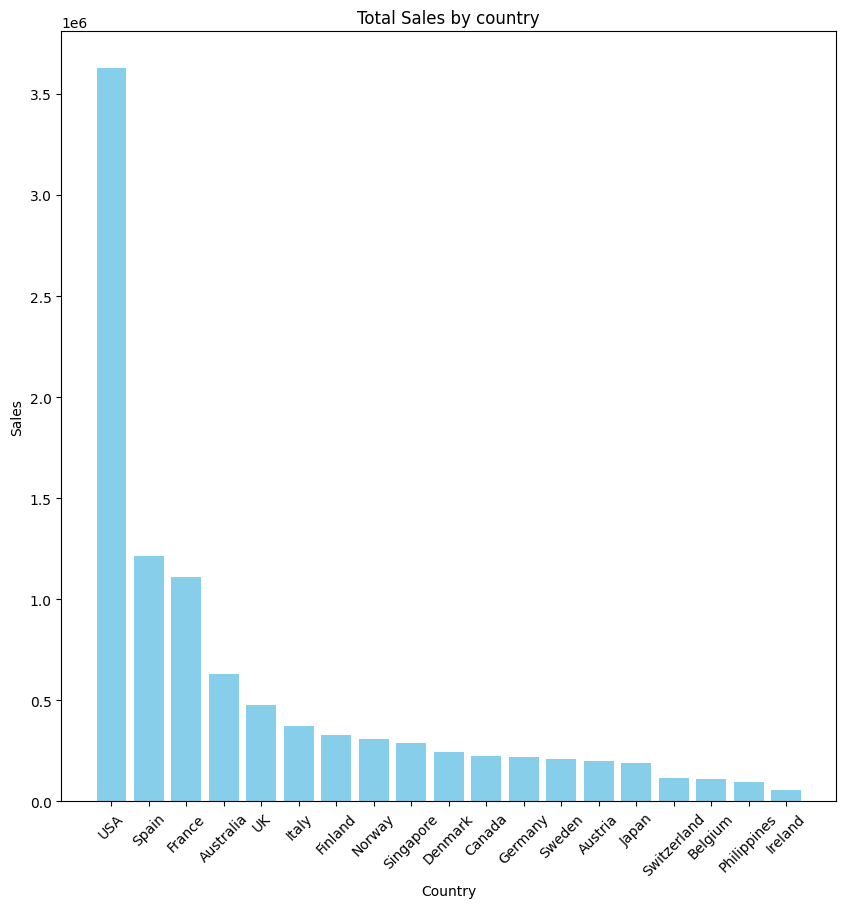

In [46]:
# Extracting data for plotting
country= df['Country']
sales = df['Total Sales']

# Set the figure size to make the plot wider
plt.figure(figsize=(10, 10))

# Create a bar chart
plt.bar(country, sales, color='skyblue')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Sales')
plt.title('Total Sales by country')

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

*Most popular product per city*

In [47]:
query = 'SELECT CITY AS "City", PRODUCTCODE AS "Product Code", SUM(QUANTITYORDERED) AS "Total number ordered" FROM sales GROUP BY CITY ORDER BY CITY, "Total number ordered" DESC'
df = pd.read_sql_query(query, connection)
df

,City,Product Code,Total number ordered
0,Aaarhus,S12_1108,882
1,Allentown,S10_1678,1111
2,Barcelona,S10_4757,882
3,Bergamo,S18_1342,1650
4,Bergen,S10_1678,973
...,...,...,...
68,Toulouse,S10_4757,687
69,Tsawassen,S10_4757,873
70,Vancouver,S10_1949,703
71,Versailles,S10_1949,637


In [48]:
query = 'SELECT CITY AS "City", PRODUCTLINE AS "Product Line", SUM(QUANTITYORDERED) AS "Total number ordered" FROM sales GROUP BY CITY ORDER BY CITY, "Total number ordered" DESC'
df = pd.read_sql_query(query, connection)
df

,City,Product Line,Total number ordered
0,Aaarhus,Classic Cars,882
1,Allentown,Motorcycles,1111
2,Barcelona,Classic Cars,882
3,Bergamo,Vintage Cars,1650
4,Bergen,Motorcycles,973
...,...,...,...
68,Toulouse,Classic Cars,687
69,Tsawassen,Classic Cars,873
70,Vancouver,Classic Cars,703
71,Versailles,Classic Cars,637


*Most popular product per country*

In [49]:
query = 'SELECT COUNTRY AS "Country", PRODUCTCODE AS "Product Code", SUM(QUANTITYORDERED) AS "Total number ordered" FROM sales GROUP BY COUNTRY ORDER BY COUNTRY, "Total number ordered" DESC'
df = pd.read_sql_query(query, connection)
df

,Country,Product Code,Total number ordered
0,Australia,S10_1678,6246
1,Austria,S10_1678,1974
2,Belgium,S10_4757,1074
3,Canada,S10_1949,2293
4,Denmark,S10_4757,2197
5,Finland,S10_1678,3192
6,France,S10_1678,11090
7,Germany,S12_1099,2148
8,Ireland,S12_1108,490
9,Italy,S10_1949,3773


In [50]:
query = 'SELECT COUNTRY AS "Country", PRODUCTLINE AS "Product Line", SUM(QUANTITYORDERED) AS "Total number ordered" FROM sales GROUP BY COUNTRY ORDER BY COUNTRY, "Total number ordered" DESC'
df = pd.read_sql_query(query, connection)
df

,Country,Product Line,Total number ordered
0,Australia,Motorcycles,6246
1,Austria,Motorcycles,1974
2,Belgium,Classic Cars,1074
3,Canada,Classic Cars,2293
4,Denmark,Classic Cars,2197
5,Finland,Motorcycles,3192
6,France,Motorcycles,11090
7,Germany,Classic Cars,2148
8,Ireland,Classic Cars,490
9,Italy,Classic Cars,3773


*Products ordered by total profit over MSRP*

In [51]:
query = 'SELECT PRODUCTCODE AS "Product Code",(SUM(PRICEEACH)-SUM(MSRP))*SUM(QUANTITYORDERED) AS "Total profit compared to MSRP" FROM sales GROUP BY PRODUCTCODE ORDER BY "Total profit compared to MSRP" DESC'
df = pd.read_sql_query(query, connection)
df

,Product Code,Total profit compared to MSRP
0,S18_4668,298661.55
1,S24_2840,248001.07
2,S72_3212,237784.77
3,S24_1937,231931.20
4,S24_2972,209267.52
...,...,...
104,S12_1099,-2043421.10
105,S10_4698,-2260649.76
106,S12_1108,-2859938.90
107,S10_1949,-3067512.00


In [52]:
query = 'SELECT PRODUCTLINE AS "Product Line",(SUM(PRICEEACH)-SUM(MSRP))*SUM(QUANTITYORDERED) AS "Total profit compared to MSRP" FROM sales GROUP BY PRODUCTLINE ORDER BY "Total profit compared to MSRP" DESC'
df = pd.read_sql_query(query, connection)
df

,Product Line,Total profit compared to MSRP
0,Trains,5.570719e+05
1,Ships,-4.322101e+06
2,Planes,-2.306605e+07
3,Trucks and Buses,-4.845436e+07
4,Motorcycles,-5.432404e+07
5,Vintage Cars,-1.063150e+08
6,Classic Cars,-1.069908e+09


*Products with highest amount made over MSRP*

In [53]:
query = 'SELECT PRODUCTCODE AS "Product Code",(SUM(PRICEEACH)-SUM(MSRP))*SUM(QUANTITYORDERED) AS "Total profit compared to MSRP" FROM sales GROUP BY PRODUCTCODE HAVING "Total profit compared to MSRP">0 ORDER BY "Total profit compared to MSRP" DESC '
df = pd.read_sql_query(query, connection)
df

,Product Code,Total profit compared to MSRP
0,S18_4668,298661.55
1,S24_2840,248001.07
2,S72_3212,237784.77
3,S24_1937,231931.20
4,S24_2972,209267.52
5,S32_3522,208606.86
6,S50_1514,199253.25
7,S50_1341,197362.44
8,S72_1253,171322.40
9,S32_2206,148055.60


In [54]:
query = 'SELECT PRODUCTLINE AS "Product Line",(SUM(PRICEEACH)-SUM(MSRP))*SUM(QUANTITYORDERED) AS "Total profit compared to MSRP" FROM sales GROUP BY PRODUCTLINE HAVING "Total profit compared to MSRP">0 ORDER BY "Total profit compared to MSRP" DESC '
df = pd.read_sql_query(query, connection)
df

,Product Line,Total profit compared to MSRP
0,Trains,557071.92


*Total amount made compared to MSRP*

In [55]:
query = 'SELECT(SUM(PRICEEACH)-SUM(MSRP))*SUM(QUANTITYORDERED) AS "Total profit compared to MSRP" FROM sales'
df = pd.read_sql_query(query, connection)
df

,Total profit compared to MSRP
0,-4.770267e+09


*Range of price per product*

In [56]:
query = 'SELECT PRODUCTCODE AS "Product Code", MIN(PRICEEACH) AS "Lowest price", MAX(PRICEEACH) AS "Highest price", AVG(PRICEEACH) AS "Average price" FROM  sales GROUP BY PRODUCTCODE'
df = pd.read_sql_query(query, connection)
df

,Product Code,Lowest price,Highest price,Average price
0,S10_1678,34.91,100.0,92.607692
1,S10_1949,100.00,100.0,100.000000
2,S10_2016,44.51,100.0,94.365769
3,S10_4698,76.67,100.0,98.593846
4,S10_4757,48.05,100.0,94.190000
...,...,...,...,...
104,S700_3505,77.34,100.0,92.877308
105,S700_3962,71.89,100.0,91.812308
106,S700_4002,55.62,100.0,73.621111
107,S72_1253,40.22,95.2,55.897037


In [57]:
query = 'SELECT PRODUCTLINE AS "Product Line", MIN(PRICEEACH) AS "Lowest price", MAX(PRICEEACH) AS "Highest price", AVG(PRICEEACH) AS "Average price" FROM  sales GROUP BY "Product Line" ORDER BY "Average price" DESC'
df = pd.read_sql_query(query, connection)
df

,Product Line,Lowest price,Highest price,Average price
0,Trucks and Buses,35.71,100.0,87.527940
1,Classic Cars,28.29,100.0,87.335781
2,Ships,43.68,100.0,83.855470
3,Motorcycles,32.59,100.0,82.997553
4,Planes,40.22,100.0,81.740915
5,Vintage Cars,26.88,100.0,78.148204
6,Trains,36.07,100.0,75.654675


In [58]:
connection.close()

**Biggest customers**

*Biggest customer by volume*

In [59]:
connection = sqlite3.connect('vehicle_sales.db')
query = 'SELECT CUSTOMERNAME AS "Customer", sum(QUANTITYORDERED) AS "Total number ordered" FROM sales GROUP BY CUSTOMERNAME ORDER BY "Total number ordered" DESC'
df = pd.read_sql_query(query, connection)
df

,Customer,Total number ordered
0,Euro Shopping Channel,9327
1,Mini Gifts Distributors Ltd.,6366
2,"Australian Collectors, Co.",1926
3,La Rochelle Gifts,1832
4,"AV Stores, Co.",1778
...,...,...
87,Cambridge Collectables Co.,357
88,Auto-Moto Classics Inc.,287
89,Royale Belge,278
90,Atelier graphique,270


*Biggest customer by sales*

In [60]:
query = 'SELECT CUSTOMERNAME AS "Customer", SUM(SALES) AS "Total Sales" FROM sales GROUP BY CUSTOMERNAME ORDER BY SUM(SALES) DESC'
df = pd.read_sql_query(query, connection)
df

,Customer,Total Sales
0,Euro Shopping Channel,912294.11
1,Mini Gifts Distributors Ltd.,654858.06
2,"Australian Collectors, Co.",200995.41
3,Muscle Machine Inc,197736.94
4,La Rochelle Gifts,180124.90
...,...,...
87,Royale Belge,33440.10
88,Microscale Inc.,33144.93
89,Auto-Moto Classics Inc.,26479.26
90,Atelier graphique,24179.96


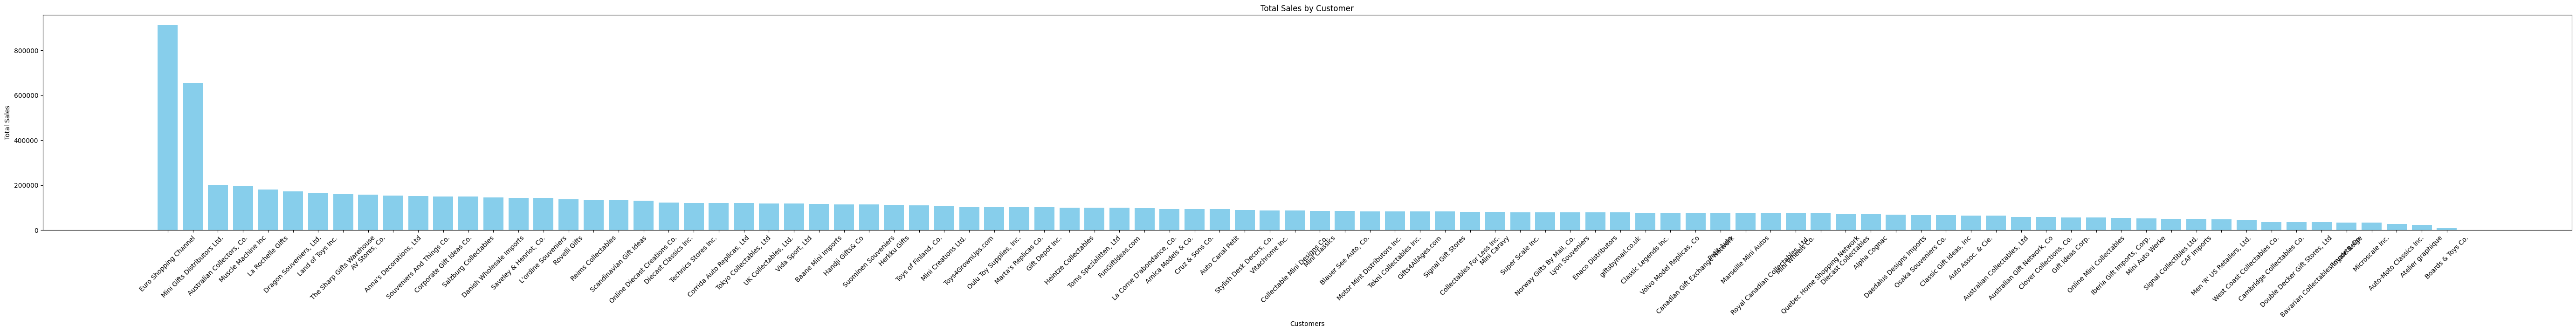

In [61]:
# Extracting data for plotting
customers = df['Customer']
sales = df['Total Sales']

# Set the figure size to make the plot wider
plt.figure(figsize=(70, 6))

# Create a bar chart
plt.bar(customers, sales, color='skyblue')

# Add labels and title
plt.xlabel('Customers')
plt.ylabel('Total Sales')
plt.title('Total Sales by Customer')

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [62]:
connection.close()

**Best time of year/ best year**

*Best year for sales*

In [63]:
connection = sqlite3.connect('vehicle_sales.db')
query = 'SELECT YEAR_ID AS "Year", SUM(SALES) AS "Total Sales (Amount)" FROM sales GROUP BY YEAR_ID ORDER BY SUM(SALES) DESC'
df = pd.read_sql_query(query, connection)
df

,Year,Total Sales (Amount)
0,2004,4724162.60
1,2003,3516979.54
2,2005,1791486.71


In [64]:
query = 'SELECT YEAR_ID AS "Year", SUM(QUANTITYORDERED) AS "Total Sales (Volume)" FROM sales GROUP BY YEAR_ID ORDER BY SUM(QUANTITYORDERED) DESC'
df = pd.read_sql_query(query, connection)
df

,Year,Total Sales (Volume)
0,2004,46824
1,2003,34612
2,2005,17631


*Best quarter*

In [65]:
query = 'SELECT QTR_ID AS "Quarter", SUM(SALES) AS "Total Sales (Amount)" FROM sales GROUP BY QTR_ID ORDER BY SUM(SALES) DESC'
df = pd.read_sql_query(query, connection)
df

,Quarter,Total Sales (Amount)
0,4,3874780.01
1,1,2350817.73
2,2,2048120.30
3,3,1758910.81


In [66]:
query = 'SELECT QTR_ID AS "Quarter", sum(QUANTITYORDERED) AS "Total Sales (Volume)" FROM sales GROUP BY QTR_ID ORDER BY SUM(QUANTITYORDERED) DESC'
df = pd.read_sql_query(query, connection)
df

,Quarter,Total Sales (Volume)
0,4,38148
1,1,23485
2,2,20316
3,3,17118


In [67]:
connection.close()

**Commentary**

Overall sales for the company are 10032628.85 (amount) and 99067 (volume), with customers from Madrid purchasing the largest volume and amount per city and Charleroi the least.  Thee USA purchased the most by country and Ireland the least.  However per capita Finland purchased the largest amount and the Philippines the least.  

The most popular products were classic cars, and least were trains, and trains were the only product sold above the recommended manufacturer price.  

All the products had a highest price of 100, with Trucks and Buses having the highest average price of 87.53, and trains having the lowest average price at 75.65.  

The biggest customer by sales volume and amount was the Euro Shopping Channel, and the smallest was Boards & Toys Co.  

The best year sales was 2004, and worst 2005.  And overall Q4 was the best quarter, with Q3 being the worst.  

**Create CSV for use in Tableau for visualisation**

In [68]:
connection = sqlite3.connect('vehicle_sales.db')
query = 'SELECT * FROM  sales'
full_df = pd.read_sql_query(query, connection)
full_df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,None,NYC,NY,10022,USA,Americas,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,05/07/2003 00:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,None,Reims,None,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,07/01/2003 00:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,None,Paris,None,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,None,Pasadena,CA,90003,USA,Americas,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 00:00,Shipped,4,10,2003,...,7734 Strong St.,None,San Francisco,CA,None,USA,Americas,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/02/2004 00:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",None,Madrid,None,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,None,Oulu,None,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,03/01/2005 00:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",None,Madrid,None,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,None,Toulouse,None,31000,France,EMEA,Roulet,Annette,Small


In [69]:
full_df.to_csv('sales_cleaned.csv')

Sales by Territory - https://public.tableau.com/views/Sales_17098879505020/SalesbyTerritory?:language=en-US&publish=yes&:sid=&:display_count=n&:origin=viz_share_link

Sales by Country - https://public.tableau.com/views/SalesbyCountry_17101426875600/SalesbyCountry?:language=en-US&publish=yes&:sid=&:display_count=n&:origin=viz_share_link

Sales by City - https://public.tableau.com/views/SalesbyCity_17101428297890/SalesbyCity?:language=en-US&:sid=&:display_count=n&:origin=viz_share_link

Sales by Customer - https://public.tableau.com/views/SalesbyCustomer_17101429724820/SalesbyCustomer?:language=en-US&publish=yes&:sid=&:display_count=n&:origin=viz_share_link

In [70]:
full_df.to_csv('sales_claned.csv')